# Time Series Analysis

Time-series analysis is a method of applying statistics to study data that changes over time, like understanding and analysing trends of data. It helps to spot patterns, trends, seasonal changes, and fluctuations in the data over various time spans. This method is helpful to figure out how the data is organized and what patterns it follows.

In this project, I am applying time series analysis to understand the trend of Etherium(ETH) price. The data is taken from Yahoo Finance and consists of trading information from '2017-11-13' till '2024-03-28'. The price is in CAD dollar.
And source of data is, https://ca.finance.yahoo.com/quote/ETH-CAD/history

Ethereum (ETH) is a cryptocurrency . Ethereum has a current supply of 120,073,215.07 and is currently trading on 8656 active market(s).

Import the modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pylab import rcParams

https://www.kaggle.com/code/satishgunjal/tutorial-time-series-analysis-and-forecasting

The dataset has 2328 samples and 7 different features. For this study, I'm focusing solely on the 'Date' and 'Close' columns. I want to examine how the 'Close' price has evolved over time.

In [2]:
data = pd.read_csv('dataset/ETH-CAD.csv')
print('Shape of the data= ', data.shape)
print('Column datatypes= \n',data.dtypes)
data

Shape of the data=  (2328, 7)
Column datatypes= 
 Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-13,389.645416,416.922852,389.614716,403.401184,403.401184,1327055273
1,2017-11-14,403.461029,433.589600,403.429352,429.905579,429.905579,1362023544
2,2017-11-15,430.329559,434.015045,421.270142,425.596863,425.596863,922627662
3,2017-11-16,425.706665,428.132111,412.985962,422.192841,422.192841,1017136674
4,2017-11-17,421.227051,429.323334,417.755615,424.101532,424.101532,793269124
...,...,...,...,...,...,...,...
2323,2024-03-24,4544.911621,4678.666992,4459.783203,4546.276367,4546.276367,18043074525
2324,2024-03-25,4546.374512,4721.906738,4498.155273,4702.513184,4702.513184,16547865693
2325,2024-03-26,4702.852539,4968.042480,4658.186035,4878.466797,4878.466797,25274729910
2326,2024-03-27,4878.740723,4994.729492,4813.238770,4872.635254,4872.635254,25134687001


In [3]:
data=data[['Date','Close']]

 First, I am converting 'Date' column in the DataFrame 'df' into datetime format using the pd.to_datetime() function from the pandas library. Then I am setting the 'Date' column as the index of the DataFrame 'df' which means that the DataFrame will be organized and accessed based on dates.


In [4]:
# Ensure frequency is set for the DatetimeIndex
df = pd.DataFrame(data)  # Assuming 'data' is the original DataFrame
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
print('Column datatypes= \n', df.dtypes)


Column datatypes= 
 Close    float64
dtype: object


Let's check if there are any missing values in the dataset.

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Close    0
dtype: int64


In [6]:
df.describe()

,Close
count,2328.000000
mean,1688.538536
std,1463.643857
min,112.834007
25%,319.362519
50%,1479.426514
75%,2537.922180
max,5987.584473


The minimum price observed for Ethereum (ETH) trading against the Canadian dollar (CAD) stands at CAD 112.83, while the maximum price reached is CAD 5987.58.

## Time Series Characteristics

Time series data has the characteristics, trend, seasonality, irregularities. Time series data exhibiting the mentioned characteristics is termed as 'Non-Stationary Data'. To conduct analysis on time series data effectively, it's important to convert it into 'Stationary Data'. The typical approach involves identifying and estimating the trend and seasonality within the time series, followed by steps to render the series stationary. Statistical techniques are then employed in the data modeling stage for time series analysis and forecasting.

### Trend

A trend in a time series signifies the directional change in the dependent variable over time, from the beginning to the end of the series. An increasing trend indicates that the dependent variable tends to rise over time, while a decreasing trend implies a decline.

Text(0.5, 1.0, 'Trend of the Time Series')

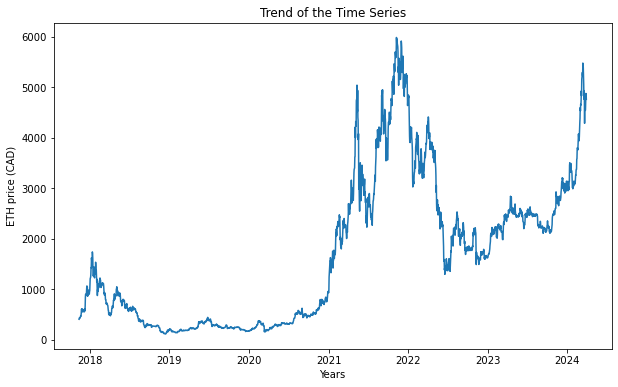

In [7]:
plt.figure(figsize= (10,6))
plt.plot(df)
plt.xlabel('Years')
plt.ylabel('ETH price (CAD)')
plt.title('Trend of the Time Series')

From the plot above, we can see that the price of Ethereum (ETH) experienced a pronounced upward trend when it initially entered trading towards the end of 2017. Subsequently, it underwent a gradual decline with minor fluctuations until the beginning of 2021. At that point, it began a rapid ascent in price, reaching its peak in 2022. Following this peak, Ethereum's price started to decrease, hitting a low point by mid-2022. However, it has since begun another upward trajectory in 2024.

### Seasonality

Observations that recur at regular time intervals are termed as seasonal observations. observing seasonality in time series data is essential for gaining insights, improving forecasting accuracy and interpreting data trends.

<AxesSubplot:title={'center':'Seasonality of the Time Series'}, xlabel='Month', ylabel='Close'>

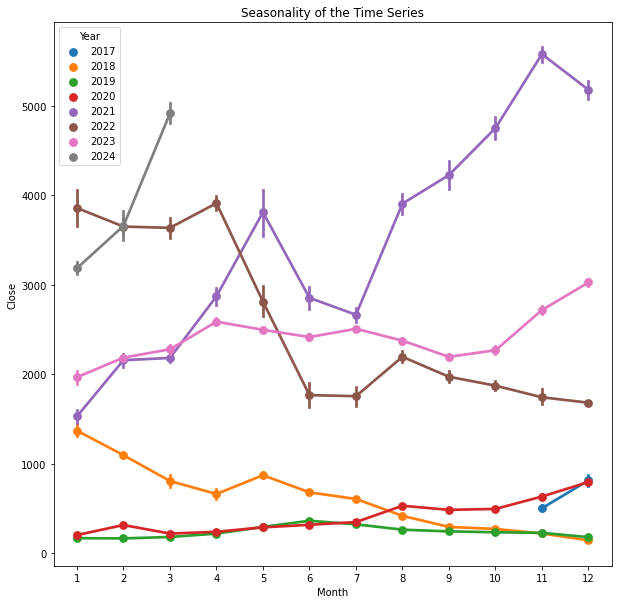

In [8]:
# To plot the seasonality we are going to create a temp dataframe and add columns for Month and Year values
df_temp = df.copy()
df_temp['Year'] = pd.DatetimeIndex(df_temp.index).year
df_temp['Month'] = pd.DatetimeIndex(df_temp.index).month
# Stacked line plot
plt.figure(figsize=(10,10))
plt.title('Seasonality of the Time Series')
sns.pointplot(x='Month',y='Close',hue='Year',data=df_temp)

From above chart, we can see that, there is no clear seasonality

### Decomposition of time series

Time series decomposition aids in breaking down the time series into distinct components such as trend and seasonality, enhancing visualization of its attributes. Employing time-series decomposition facilitates identification of alterations in the data's mean or variability.

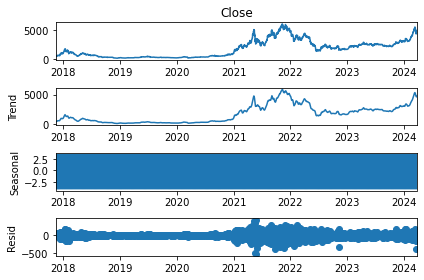

In [9]:
decomposition = sm.tsa.seasonal_decompose(df['Close'], model='additive') 
fig = decomposition.plot()

### Check for stationarity

To ensure accurate analysis and forecasting, it's essential to eliminate trend and seasonality from the time series, transforming it into a stationary series. Stationary time series data maintains constant statistical properties such as mean and standard deviation, devoid of any seasonality. Put simply, the statistical characteristics of stationary time series data should remain consistent over time, without being influenced by temporal factors.

To check the stationarity of timeseries data, I have defined a function 'stationarity_test()'. The function calculates rolling statistics, specifically the rolling mean and rolling standard deviation, for the time series data using a rolling window of 12 data points. This window size corresponds to a yearly interval in this particular context. It then plots the original time series data along with its rolling mean and rolling standard deviation on a single graph. This visualization helps in understanding how the mean and variability of the data change over time.After plotting the rolling statistics, the function conducts the Dickey-Fuller test to assess the stationarity of a time series.

Dickey-Fuller test is a statistical test used to determine whether a given time series is stationary or non-stationary. It specifically tests the null hypothesis that a unit root is present in the time series data, indicating non-stationarity. The presence of a unit root suggests that the series is non-stationary, meaning that its statistical properties such as mean and variance change over time.

The test produces a test statistic and a p-value. The test statistic is compared to critical values at certain significance levels to determine whether to reject the null hypothesis. 
- If the test statistic is less than the critical value, the null hypothesis is rejected, indicating that the time series is stationary.
- If the test statistic is greater than the critical value, the null hypothesis cannot be rejected, suggesting that the time series is non-stationary.

In [10]:
def stationarity_test(timeseries):
    # Get rolling statistics for window = 12 i.e. yearly statistics
    rolling_mean = timeseries.rolling(window = 12).mean()
    rolling_std = timeseries.rolling(window = 12).std()
    
    # Plot rolling statistic
    plt.figure(figsize= (10,6))
    plt.xlabel('Years')
    plt.ylabel('Price of Bitcoin')    
    plt.title('Stationary Test: Rolling Mean and Standard Deviation')
    plt.plot(timeseries, color= 'blue', label= 'Original')
    plt.plot(rolling_mean, color= 'green', label= 'Rolling Mean')
    plt.plot(rolling_std, color= 'red', label= 'Rolling Std')   
    plt.legend()
    plt.show()
    
    # Dickey-Fuller test
    print('Results of Dickey-Fuller Test')
    df_test = adfuller(timeseries)
    df_output = pd.Series(df_test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in df_test[4].items():
        df_output['Critical Value (%s)' %key] = value
    print(df_output)

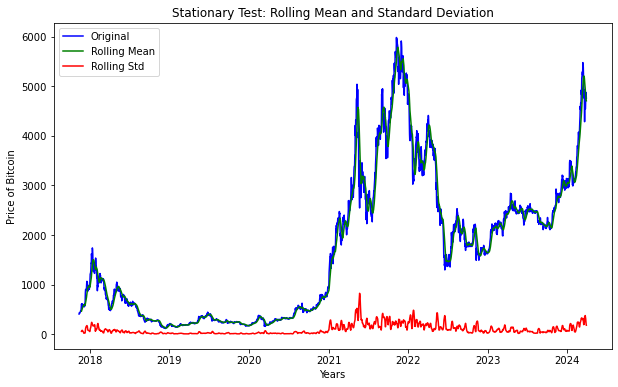

Results of Dickey-Fuller Test
Test Statistic                   -0.843281
p-value                           0.806077
#Lags Used                       17.000000
Number of Observations Used    2310.000000
Critical Value (1%)              -3.433184
Critical Value (5%)              -2.862792
Critical Value (10%)             -2.567437
dtype: float64


In [11]:
stationarity_test(df)

From above result, we can observe that;
- test Statistic is greater than critical value i.e. -0.5843281>-3.433184 (1%), -2.862792 (5%), and -2.567437 (10%) 
- p-value (0.806077) is much higher than typical significance levels (0.05 or 0.01)
- number of lags used were 17 in this test, which indicates the differences that were considered to account for autocorrelation in the series
This result suggests that, time series is non-stationary

### Convert non-stationary data to stationary data

#### Differencing method

The differencing technique is employed to eliminate both trend and seasonality from time series data. It involves subtracting the previous observation from the current one. As a result, the differenced data will have one less data point compared to the original data. This reduction in observations stabilizes the mean of the time series, making it more suitable for analysis.

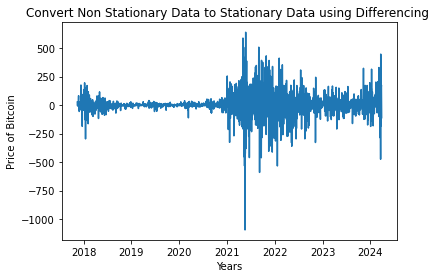

In [12]:
df_diff = df.diff(periods = 1) # First order differencing
plt.xlabel('Years')
plt.ylabel('Price of Bitcoin')    
plt.title('Convert Non Stationary Data to Stationary Data using Differencing ')
plt.plot(df_diff)

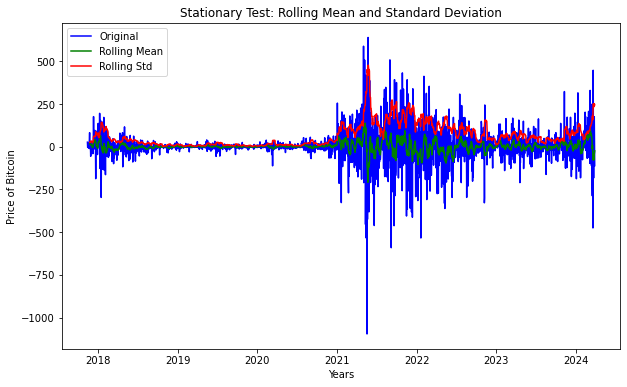

Results of Dickey-Fuller Test
Test Statistic                -1.190995e+01
p-value                        5.325698e-22
#Lags Used                     1.600000e+01
Number of Observations Used    2.310000e+03
Critical Value (1%)           -3.433184e+00
Critical Value (5%)           -2.862792e+00
Critical Value (10%)          -2.567437e+00
dtype: float64


In [13]:
df_diff.dropna(inplace = True)# Data transformation may add na values
stationarity_test(df_diff)

After applying the differencing technique, we  can observe that p-value is extremely low providing strong evidence against the null hypothesis. However, Test Statistic is still positive than Critical Value thus requiring further application of additional transformation.

### Log Transformation


A straightforward yet often effective method to stabilize variance across time is by applying a power transformation to the time series. Common transformations include logarithmic, square root, and cube root functions. Since variance is proportional to the levels, I am applying logarithmic transformation for this study.

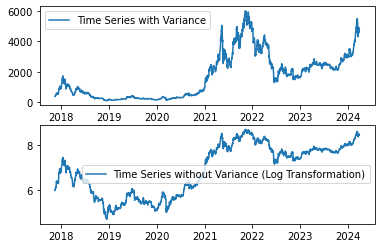

In [14]:
df_log = np.log(df)

plt.subplot(211)
plt.plot(df, label= 'Time Series with Variance')
plt.legend()
plt.subplot(212)
plt.plot(df_log, label='Time Series without Variance (Log Transformation)')
plt.legend()  
plt.show()

In [16]:
df= np.exp(df_log)

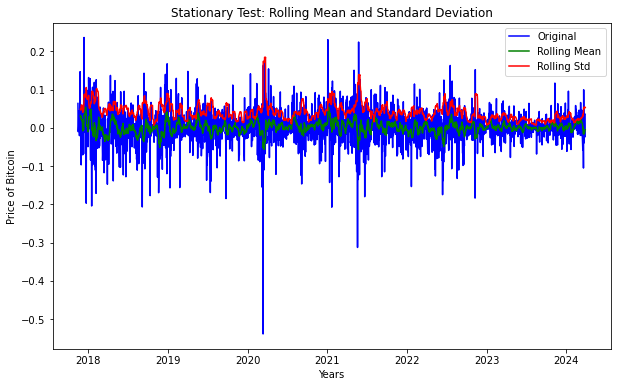

Results of Dickey-Fuller Test
Test Statistic                -1.669045e+01
p-value                        1.490043e-29
#Lags Used                     7.000000e+00
Number of Observations Used    2.319000e+03
Critical Value (1%)           -3.433173e+00
Critical Value (5%)           -2.862787e+00
Critical Value (10%)          -2.567434e+00
dtype: float64


In [17]:
df_log_diff = df_log.diff(periods = 1) # First order differencing
df_log_diff.dropna(inplace = True)# Data transformation may add na values
stationarity_test(df_log_diff)

### Moving Average

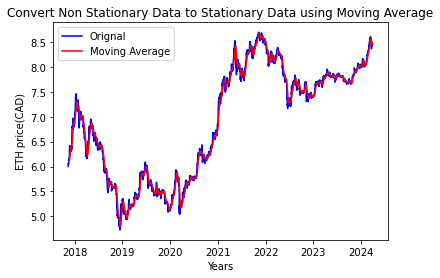

In [24]:
df_log_moving_avg = df_log.rolling(window = 12).mean()
plt.xlabel('Years')
plt.ylabel('ETH price(CAD)')    
plt.title('Convert Non Stationary Data to Stationary Data using Moving Average')
plt.plot(df_log, color= 'blue', label='Orignal')
plt.plot(df_log_moving_avg, color= 'red', label='Moving Average')
plt.legend()

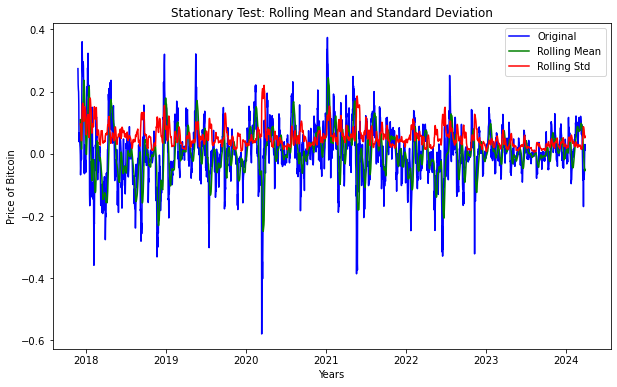

Results of Dickey-Fuller Test
Test Statistic                -9.715550e+00
p-value                        9.852244e-17
#Lags Used                     1.300000e+01
Number of Observations Used    2.303000e+03
Critical Value (1%)           -3.433193e+00
Critical Value (5%)           -2.862796e+00
Critical Value (10%)          -2.567439e+00
dtype: float64


In [25]:
df_log_moving_avg_diff = df_log - df_log_moving_avg
df_log_moving_avg_diff.dropna(inplace = True)
stationarity_test(df_log_moving_avg_diff)

From this result we can see that the test statistic is more negative than the critical values at all levels of significance (1%, 5%, and 10%).
The p-value is very close to zero (9.852244e-17), indicating strong evidence against the null hypothesis. Therefore, we reject the null hypothesis of the Dickey-Fuller Test. These results suggest that the time series is stationary.

### Forecasting